# Import Required Libraries
Import the necessary libraries, including OpenCV, NumPy, and Matplotlib.

image.shape: (381, 601)
scale: 20.05263157894737
area_0: 167058 pix, 415.45551491102975 mm^2


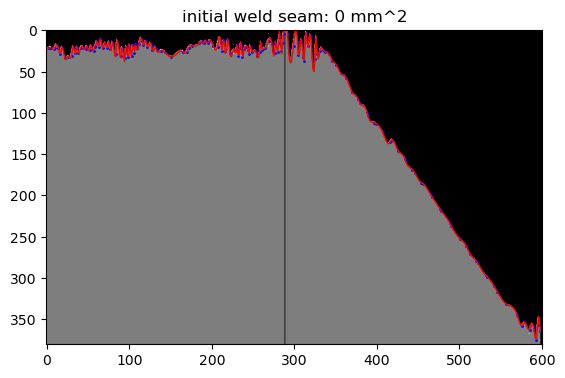

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# 加载图像
img = './images/projected_image_5.png'
image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
print('image.shape:', image.shape)

pix_height = image.shape[0]
pix_width = image.shape[1]
real_height = 19
scale = pix_height / real_height
print('scale:', scale)

# 提取白色点的坐标
points = np.column_stack(np.where(image == 255))

# 按x坐标排序
points = points[points[:, 1].argsort()]

# 对相同x坐标的点取平均值
unique_x = np.unique(points[:, 1])
avg_points = []
for x in unique_x:
    y_values = points[points[:, 1] == x][:, 0]
    avg_y = np.mean(y_values)
    avg_points.append([avg_y, x])

avg_points = np.array(avg_points)

# 拟合样条曲线
x_data = avg_points[:, 1]  # x坐标
y_data = avg_points[:, 0]  # y坐标
spline = UnivariateSpline(x_data, y_data, s=0.1)

# 生成拟合曲线的点
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = spline(x_fit)

# 创建掩码图像
mask_0 = np.zeros_like(image, dtype=np.uint8)

# 将拟合曲线以下的区域填充为白色
for i in range(len(x_fit) - 1):
    x1, y1 = int(x_fit[i]), int(y_fit[i])
    x2, y2 = int(x_fit[i + 1]), int(y_fit[i + 1])
    cv2.line(mask_0, (x1, y1), (x2, y2), 255, 1)

# 填充曲线以下的区域
for x in range(mask_0.shape[1]):
    y_values = np.where(mask_0[:, x] == 255)[0]
    if len(y_values) > 0:
        y_min = y_values.min()
        mask_0[y_min:, x] = 255

# 计算填充区域的面积
area = np.sum(mask_0 == 255)
# print('area:', area)
print(f'area_0: {area} pix, {area / scale ** 2} mm^2')

# 绘制结果
plt.imshow(image, cmap='gray')
plt.plot(x_fit, y_fit, color='red', linewidth=1)
plt.scatter(x_data, y_data, color='blue', s=1)
plt.imshow(mask_0, cmap='gray', alpha=0.5)
plt.title(f'Spline Curve Fitting on White Points\nArea below curve: {area} pixels')
plt.title(f'initial weld seam: {0} mm^2')
plt.show()

col: 522
y1_pix 561.5
y1_weldpos -1.969816272965879
weldpos:(y, z) = (-1.969816272965879, 5 ) / mm
y_values: []
y_values: []
y_values: []
y_values: []
area_1: 3928 pix, 9.768519092593738 mm^2


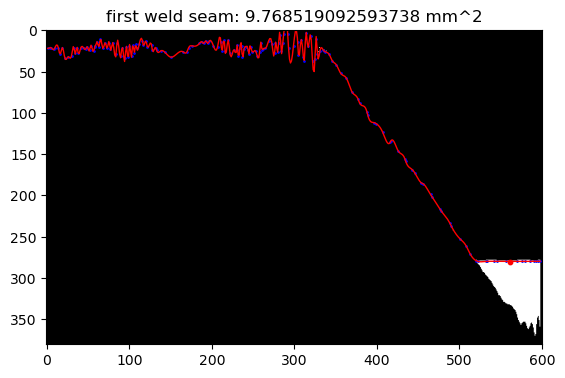

In [18]:
z1_weldpos = 5
x1_pix = pix_height - scale * z1_weldpos
col_corner = float('inf')
# colum = []
for i, point in enumerate(points):
    x, y = point
    if x >= x1_pix:
        col_corner = min(col_corner, y)
        # colum.append(z)
        points[i][0] = x1_pix
print('col:', col_corner)

y1_pix = (image.shape[1] + col_corner) / 2
print('y1_pix' ,y1_pix)

y1_weldpos = - (image.shape[1] - y1_pix) / scale
print('y1_weldpos', y1_weldpos)
print(f'weldpos:(y, z) = ({y1_weldpos}, {z1_weldpos} ) / mm')

# print('colum:', colum)

# 对相同x坐标的点取平均值
unique_x = np.unique(points[:, 1])
avg_points = []
for x in unique_x:
    y_values = points[points[:, 1] == x][:, 0]
    avg_y = np.mean(y_values)
    avg_points.append([avg_y, x])

avg_points = np.array(avg_points)

# 拟合样条曲线
x_data = avg_points[:, 1]  # x坐标
y_data = avg_points[:, 0]  # y坐标
spline = UnivariateSpline(x_data, y_data, s=0.1)

# 生成拟合曲线的点
x_fit = np.linspace(x_data.min(), x_data.max(), 500)
y_fit = spline(x_fit)

# 创建掩码图像
mask_1 = np.zeros_like(image, dtype=np.uint8)

# 将拟合曲线以下的区域填充为白色
for i in range(len(x_fit) - 1):
    x1, y1 = int(x_fit[i]), int(y_fit[i])
    x2, y2 = int(x_fit[i + 1]), int(y_fit[i + 1])
    cv2.line(mask_1, (x1, y1), (x2, y2), 255, 1)

# 填充曲线以下的区域
for x in range(mask_1.shape[1]):
    y_values = np.where(mask_1[:, x] == 255)[0]
    if len(y_values) > 0:
        y_min = y_values.min()
        mask_1[y_min :, x] = 255
    else:
        print('y_values:', y_values)

mask_1 = mask_1 - mask_0

# 计算填充区域的面积
area_1 = np.sum(mask_1 == 255)

# 打印mask_1中为255的坐标
coords = np.column_stack(np.where(mask_1 == 255))
# for coord in coords:
    # print(f"({coord[1]}, {coord[0]})")

# print('area:', area, 'pix')
# print('area:', area / (scale * scale), 'mm^2')
print(f'area_1: {area_1} pix, {area_1 / scale ** 2} mm^2')

# 绘制结果
plt.imshow(image, cmap='gray')
plt.plot(x_fit, y_fit, color='red', linewidth=1)
plt.scatter(x_data, y_data, color='blue', s=1)
plt.scatter([y1_pix], [x1_pix], color='red', s=10)
plt.imshow(mask_1, cmap='gray', alpha=1)
plt.title(f'first weld seam: {area_1 / (scale * scale)} mm^2')
plt.show()

In [14]:
from math import pi

# 焊接参数计算
# 送丝速度 v_wire = 1.2 m / min
# 焊丝直径 d = 2 mm
# 焊接速度 v_speed (mm/s)


def calculate_v_speed(area, v_wire=12, d=2):
    # 焊丝截面积
    s = pi * (d / 2) ** 2
    # 计算焊接速度
    v_speed = (s * v_wire * 1000 / 60) / area
    return v_speed

# Example usage
area_1_mm2 = area_1 / (scale ** 2)
print(area_1_mm2)
v_speed = calculate_v_speed(area_1_mm2)
print(f'v_speed: {v_speed} mm/s')


10.683696034058732
v_speed: 58.8109703528565 mm/s
